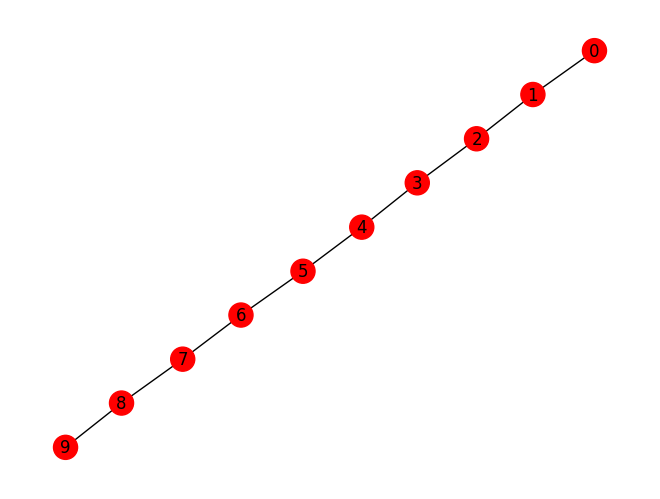

In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Exercise a

# Initial configuration
N = 10
edges = []
for i in range(N-1):
    edges.append((i, i+1))

G = nx.Graph()
G.add_edges_from(edges)
W = nx.to_numpy_array(G)

C = ['red', 'green']

X = np.full(N, 'red', dtype=str)
nx.draw_kamada_kawai(G, node_color=X, with_labels=True)

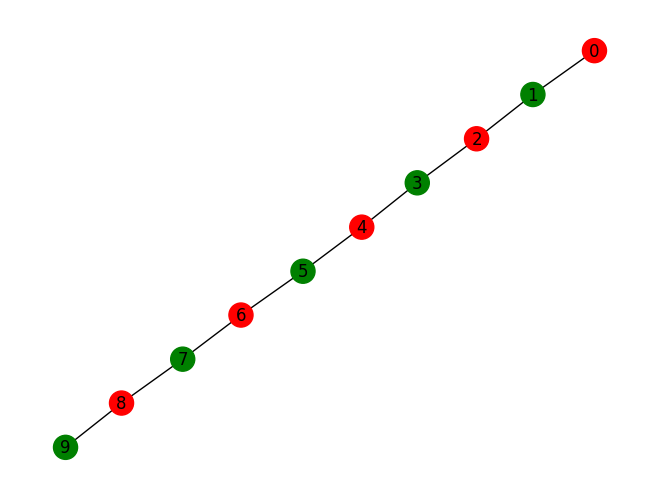

In [89]:
# Initially, c = 1 for each pair of nodes since they all have the same color
U = np.sum(W) * 0.5
U_hist = [U]
t = 0
while(U > 0):
    # Wake up random node
    node = np.random.choice(range(N))
    
    eta = t/50
    prob = []
    W_i = W[:,node]

    # Compute the probability of choosing each color
    for s in C:
        exponent = 0
        for j in range(N):
            exponent += W_i[j]*int(s == X[j])
        
        P_s = np.exp(-eta*exponent)
        prob.append(P_s)
    prob /= np.sum(prob)
    
    # Update the color of the node
    X[node] = np.random.choice(C, p=prob)
    
    # Compute new potential
    U = 0
    for i in range(N):
        for j in range(N):
            U += W[i][j] * int(X[j] == X[i])
    U /= 2
    U_hist.append(U)
    t += 1

nx.draw_kamada_kawai(G, node_color=X, with_labels=True)

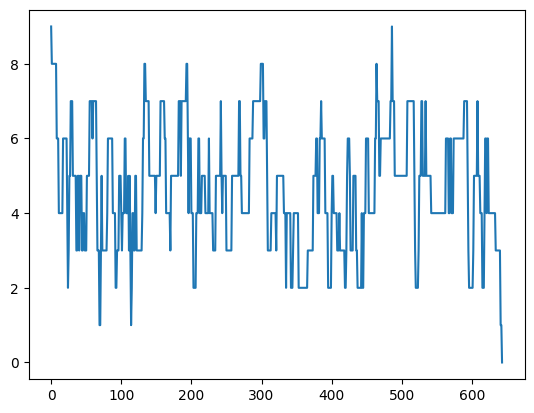

In [90]:
plt.plot(range(t+1), U_hist)

False


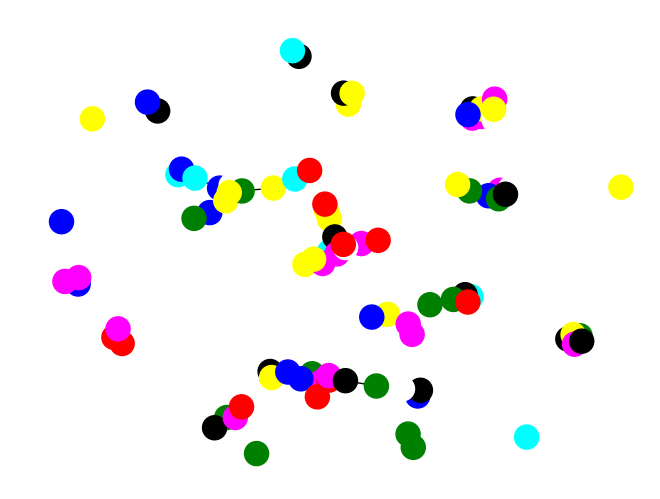

In [92]:
# Exercise b:

W = sp.io.loadmat('wifi.mat')["wifi"]
G = nx.from_numpy_array(W)
X = np.random.randint(1, 9, np.size(W, 1))
C = range(1, 9)
N = np.size(W, 1)
colors = np.array(['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white', 'black'])

col = colors[X-1]
nx.draw(G, node_color=col)
print(nx.is_planar(G))

In [58]:

t = 0
U = 0
for i in range(N):
    for j in range(N):
        U_ij = W[i][j]
        if X[i] == X[j]:
            U_ij *= 2
        elif np.abs(X[i]-X[j]) > 1:
            U_ij = 0
        U += U_ij

U /= 2
U_hist = [U]

while t < 1000:
    # Wake up random node
    node = np.random.choice(range(N))
    eta = 1.0
    prob = []
    W_i = W[:,node]

    # Compute the probability of choosing each color
    for s in C:
        exponent = 0
        for j in range(N):
            exp_sj = W_i[j]
            if X[j] == s:
                exp_sj *= 2
            elif np.abs(s-X[j]) > 1:
                exp_sj = 0
            exponent += exp_sj

        
        P_s = np.exp(-eta*exponent)
        prob.append(P_s)
    prob /= np.sum(prob)
    
    # Choose random color based on probabilities
    X[node] = np.random.choice(C, p=prob)
    
    # Compute new potential
    U = 0
    for i in range(N):
        for j in range(N):
            U_ij = W[i][j]
            if X[i] == X[j]:
                U_ij *= 2
            elif np.abs(X[i]-X[j]) > 1:
                U_ij = 0
            U += U_ij
    U /= 2
    U_hist.append(U)
    print(U)
    t += 1

73.0
71.0
70.0
69.0
69.0
67.0
69.0
68.0
67.0
64.0
63.0
62.0
60.0
60.0
59.0
59.0
57.0
55.0
55.0
55.0
56.0
56.0
55.0
56.0
58.0
56.0
51.0
52.0
51.0
51.0
51.0
50.0
49.0
49.0
48.0
49.0
50.0
47.0
46.0
48.0
47.0
45.0
45.0
44.0
45.0
45.0
45.0
43.0
43.0
42.0
41.0
40.0
40.0
39.0
40.0
41.0
41.0
43.0
42.0
42.0
41.0
42.0
42.0
42.0
41.0
41.0
40.0
41.0
42.0
44.0
42.0
42.0
42.0
42.0
41.0
40.0
40.0
41.0
39.0
40.0
40.0
43.0
43.0
43.0
43.0
44.0
43.0
43.0
44.0
42.0
40.0
40.0
40.0
39.0
38.0
35.0
36.0
36.0
36.0
37.0
37.0
37.0
37.0
37.0
37.0
37.0
37.0
38.0
37.0
37.0
36.0
37.0
34.0
31.0
32.0
31.0
30.0
25.0
25.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
24.0
24.0
27.0
28.0
28.0
27.0
27.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
30.0
30.0
28.0
28.0
28.0
28.0
28.0
27.0
27.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
23.0
24.0
24.0
24.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
23.0
23.0
23.0
23.0
25.0
24.0
24.0
24.0
24.0
24.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
25.0
25.0
25.0
24.0


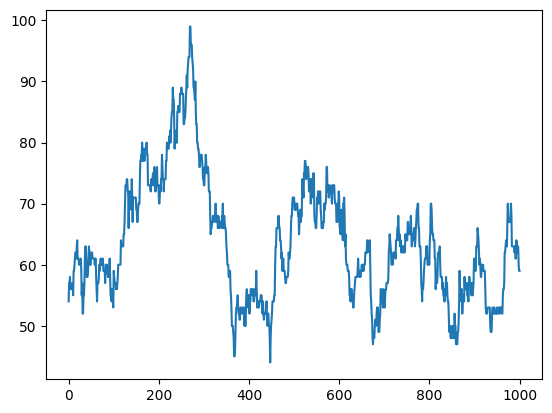

In [49]:
plt.plot(range(t+1), U_hist)

In [53]:
print(np.exp(-np.inf)/np.exp(-np.inf))

nan


C:\Users\giova\AppData\Local\Temp\ipykernel_17248\2013899935.py:1: RuntimeWarning: invalid value encountered in scalar divide
  print(np.exp(-np.inf)/np.exp(-np.inf))
